# Training First Release Candidate for Model

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from meteo_imp.kalman.fastai import *
from meteo_imp.kalman.filter import *
from meteo_imp.utils import *
from meteo_imp.data import *
from meteo_imp.gaussian import *

from fastai.tabular.learner import *
from fastai.learner import *
from fastai.callback.all import *
from fastcore.foundation import L

from meteo_imp.kalman.fastai import show_results
import pandas as pd
import numpy as np
import torch

from sklearn.decomposition import PCA

In [ ]:
reset_seed()

## Hai Small

In [ ]:
hai = pd.read_parquet(hai_path64)
hai_era = pd.read_parquet(hai_era_path64)

In [ ]:
dls = imp_dataloader(hai, hai_era, var_sel = ['TA', 'SW_IN', 'VPD'], block_len=100, gap_len=10, bs=20, control_lags=[1], n_rep=3).cpu()

In [ ]:
model = KalmanFilterSR.init_local_slope_pca(3,3)

In [ ]:
items = [dls.valid.items[i] for i in [10, 50, 100, 200, 300, 400]]

In [ ]:
learn = Learner(dls, model, KalmanLoss(only_gap=True), cbs = [Float64Callback], metrics=imp_metrics)

In [ ]:
model.use_smooth = True

In [ ]:
data, mask, control = dls.one_batch()[0]

In [ ]:
data.shape

torch.Size([20, 100, 3])

In [ ]:
learn.fit(2, 5e-3)

In [ ]:
learn

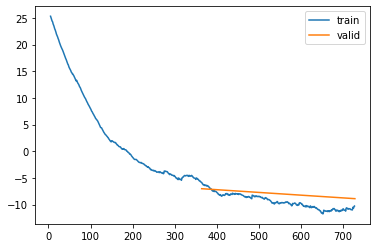

In [ ]:
learn.recorder.plot_loss()

In [ ]:
show_results(learn, items = items, control=hai_control)

alt.HConcatChart(...)

In [ ]:
learn.save("trained_30_jan_v1")

Path('models/trained_30_jan_v1.pth')

In [ ]:
torch.save(learn.model, "trained_30_jan_v1.pickle")

In [ ]:
interact_results(learn, hai, hai_era)

ValueError: <fastai.learner.Learner object at 0x7f13b9745900> cannot be transformed to a widget

## Hai Big

In [ ]:
haiB = pd.read_parquet(hai_big_path)
hai_eraB = pd.read_parquet(hai_era_big_path)

In [ ]:
dlsB = imp_dataloader(haiB, haiB, var_sel = gen_var_sel(list(haiB.columns)), block_len=100, gap_len=10, bs=20, control_lags=[1], n_rep=5).cpu()

In [ ]:
list(haiB.columns)

['TA', 'SW_IN', 'VPD', 'PA', 'P', 'WS', 'LW_IN']

In [ ]:
len(haiB.columns)

7

In [ ]:
modelB = KalmanFilterSR.init_local_slope_pca(len(haiB.columns),len(haiB.columns))

In [ ]:
items = [dlsB.valid.items[i] for i in [10, 50, 100, 200, 300, 400]]

In [ ]:
learnB = Learner(dlsB, modelB, KalmanLoss(only_gap=True), cbs = [Float64Callback], metrics=imp_metrics)

In [ ]:
haiB.isna().any()

TA       False
SW_IN    False
VPD      False
PA       False
P        False
WS       False
LW_IN    False
dtype: bool

In [ ]:
modelB.use_smooth = True

In [ ]:
learnB.fit(5, 1e-3)

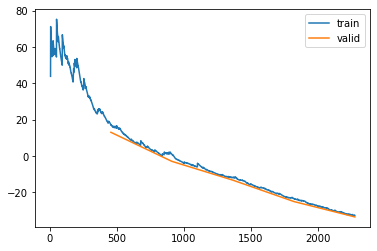

In [ ]:
learnB.recorder.plot_loss()

In [ ]:
show_results(learnB, items = items)

alt.HConcatChart(...)

In [ ]:
torch.save(learnB.model, "trained_30_jan_big_v2.pickle")

In [ ]:
learnB.fit(2, 1e-3)

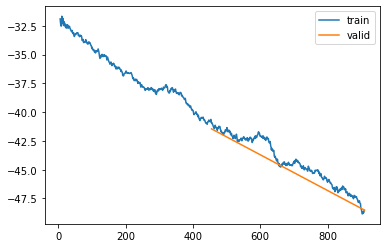

In [ ]:
learnB.recorder.plot_loss()

In [ ]:
learnB.fit(2, 1e-3)

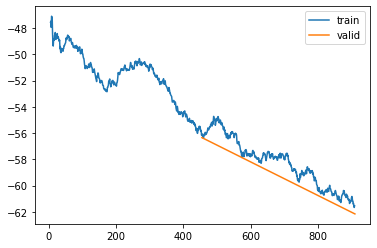

In [ ]:
learnB.recorder.plot_loss()

In [ ]:
show_results(learnB, items = items)

alt.HConcatChart(...)

In [ ]:
# learnB.save("trained_30_jan_big_v1")

Path('models/trained_30_jan_big_v1.pth')

In [ ]:
torch.save(learnB.model, "trained_31_jan_big_v1.pickle")

### Train all at once

In [ ]:
modelB2 = KalmanFilterSR.init_local_slope_pca(len(haiB.columns),len(haiB.columns))

In [ ]:
dlsB2 = imp_dataloader(haiB, haiB, var_sel = gen_var_sel(list(haiB.columns)), block_len=100, gap_len=10, bs=10, control_lags=[1], n_rep=10).cpu()

In [ ]:
learnB2 = Learner(dlsB2, modelB2, KalmanLoss(only_gap=True), cbs = [Float64Callback], metrics=imp_metrics)

In [ ]:
learnB2.fit(15, 5e-4)

_LinAlgError: linalg.cholesky: (Batch element 0): The factorization could not be completed because the input is not positive-definite (the leading minor of order 7 is not positive-definite).

In [ ]:
learnB2.export("trained_var_partial_missing_big_31_jan_v1")

In [ ]:
interact_results(learn, hai, hai_era)

ValueError: <fastai.learner.Learner object at 0x7f13b9745900> cannot be transformed to a widget

### All vars missing

In [ ]:
modelB_all = KalmanFilterSR.init_local_slope_pca(len(haiB.columns),len(haiB.columns))

In [ ]:
dlsB_all = imp_dataloader(haiB, haiB, var_sel = list(haiB.columns), block_len=100, gap_len=10, bs=20, control_lags=[1], n_rep=5).cpu()

In [ ]:
learnB_all = Learner(dlsB_all, modelB_all, KalmanLoss(only_gap=True), cbs = [Float64Callback], metrics=imp_metrics)

In [ ]:
learnB_all.fit(5, 1e-3)

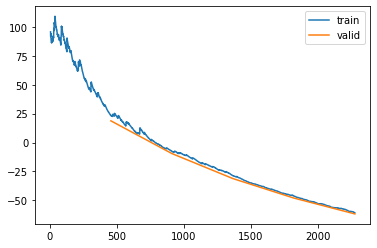

In [ ]:
learnB_all.recorder.plot_loss()

In [ ]:
torch.save(learnB_all.model, "trained_31_jan_big_all_gap_v1.pickle")

### Only TA Missing

In [ ]:
model_TA = KalmanFilterSR.init_local_slope_pca(len(haiB.columns),len(haiB.columns))

In [ ]:
dls_TA = imp_dataloader(haiB, haiB, var_sel = ['TA'], block_len=100, gap_len=10, bs=20, control_lags=[1], n_rep=5).cpu()

In [ ]:
learn_TA = Learner(dls_TA, model_TA, KalmanLoss(only_gap=True), cbs = [Float64Callback], metrics=imp_metrics)

In [ ]:
learn_TA.fit(5, 1e-3)

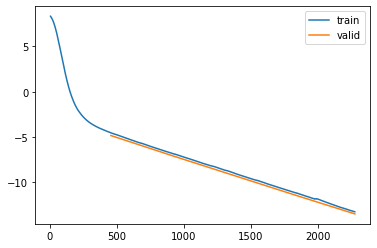

In [ ]:
learn_TA.recorder.plot_loss()

In [ ]:
torch.save(learn_TA.model, "trained_31_jan_big_TA_v1.pickle")

In [ ]:
show_results(learn_TA, items = items)

alt.HConcatChart(...)

### Only SW_IN Missing

In [ ]:
model_SW_IN = KalmanFilterSR.init_local_slope_pca(len(haiB.columns),len(haiB.columns))

In [ ]:
dls_SW_IN = imp_dataloader(haiB, haiB, var_sel = ['SW_IN'], block_len=100, gap_len=10, bs=20, control_lags=[1], n_rep=5).cpu()

In [ ]:
learn_SW_IN = Learner(dls_SW_IN, model_SW_IN, KalmanLoss(only_gap=True), cbs = [Float64Callback], metrics=imp_metrics)

In [ ]:
learn_SW_IN.fit(3, 1e-3)

In [ ]:
# torch.save(learn_SW_IN.model, "trained_31_jan_big_SW_IN_v1.pickle")

In [ ]:
learn_SW_IN.model = torch.load("trained_31_jan_big_SW_IN_v1.pickle")

In [ ]:
import random

In [ ]:
items = random.choices(dls_SW_IN.valid.items, k=6)

In [ ]:
haiB

TA  SW_IN    VPD      PA    P    WS    LW_IN
time                                                               
2000-01-01 00:30:00 -0.60    0.0  0.222  96.630  0.0  2.05  302.475
2000-01-01 01:00:00 -0.65    0.0  0.122  96.580  0.0  2.53  302.475
2000-01-01 01:30:00 -0.58    0.0  0.090  96.560  0.0  3.15  301.677
2000-01-01 02:00:00 -0.51    0.0  0.110  96.560  0.0  3.12  301.677
2000-01-01 02:30:00 -0.49    0.0  0.102  96.570  0.0  3.04  301.677
...                   ...    ...    ...     ...  ...   ...      ...
2012-12-31 22:00:00  4.75    0.0  2.249  95.212  0.0  4.28  268.160
2012-12-31 22:30:00  4.48    0.0  2.154  95.183  0.0  4.47  278.250
2012-12-31 23:00:00  4.32    0.0  2.108  95.164  0.0  3.73  263.720
2012-12-31 23:30:00  4.02    0.0  1.996  95.142  0.0  3.41  269.440
2013-01-01 00:00:00  3.99    0.0  2.000  95.106  0.0  3.96  282.740

[227952 rows x 7 columns]

In [ ]:
show_results(learn_SW_IN, items = items)

alt.HConcatChart(...)

In [ ]:
model_SW_IN2 = KalmanFilterSR.init_local_slope_pca(len(haiB.columns),len(haiB.columns))

In [ ]:
learn_SW_IN2 = Learner(dls_SW_IN, model_SW_IN2, KalmanLoss(only_gap=True), cbs = [Float64Callback], metrics=imp_metrics)

In [ ]:
item_train = random.choices(dls_SW_IN.train.items, k=3)

In [ ]:
show_results(learn_SW_IN2, items = item_train)

alt.HConcatChart(...)

In [ ]:
show_results(learn_SW_IN, items = item_train)

alt.HConcatChart(...)

In [ ]:
from fastcore.basics import *

In [ ]:
# learn_SW_IN.export('learn_SW_IN_only_big_31_jan')

In [ ]:
learn2 = load_learner('learn_SW_IN_only_big_31_jan')

In [ ]:
class KalmanImputation:
    name = "KalmanFilter"
    def __init__(self, model, df, control, block_len):
        store_attr()
        # this is not important
        dls = imp_dataloader(self.df, self.control, var_sel = ['SW_IN'], block_len=self.block_len, gap_len=10, bs=20, control_lags=[1], n_rep=3).cpu()
        self.learn = Learner(self.dls, self.model, KalmanLoss(only_gap=False), cbs = [Float64Callback], metrics=imp_metrics)
    def __call__(self, item):
        pred, targ, losses, metrics = get_results(self.learn, items = [item])
        pred[0].mean[targ[0].mask] = targ[0].data[targ[0].mask]
        return pred[0].mean

In [ ]:
class KalmanFilterSettingComparison():
    def __init__(self, model, df, control, block_len):
        store_attr()
        self.columns = list(df.columns)
        self.k_imp = KalmanImputation(model, df, control, block_len)
        
    def _imp_compare_single(self, gap_len, var, n_rep, gap_single_var, use_control):
        """Compares `n_rep` times the imputation methods, for gap in `var` with len `gap_len`"""
        self.model.use_control = use_control
        pipe, block_ids = imp_pipeline(self.df, self.control,
                                       [var] if gap_single_var else self.columns,
                                       gap_len=gap_len,
                                       block_len=self.block_len,
                                       control_lags = [1], n_rep=1)
        pipe = Pipeline(pipe[:-3]) 
        raw_items = random.choices(block_ids, k=n_rep)
    
        out = []
        for r_item in raw_items:
            item = pipe(r_item)
            pred = self.k_imp(t_item)
            out.append({
                 'rmse': rmse_mask(item, pred).item(),
                 'var': var,
                 'gap_len': gap_len,
                 'gap_single_var': gap_single_var,
                 'use_control': use_control
            })
        return pl.DataFrame(out)
    
    def imp_compare(self, gap_len, var, gap_single_var, use_control, n_rep):
        """Compare imputation performance for all combination of parameters"""
        args = {name: tuplify(val) for val, name in zip([gap_len, var, gap_single_var, use_control], ['gap_len', 'var', 'gap_single_var', 'use_control'])}
        arg_sets = list(product_dict(**args))
        out = []
        for arg_set in tqdm(arg_sets):
            out.append(self._imp_compare_single(**arg_set, n_rep=n_rep))
        return pl.concat(out)
        

In [ ]:
def _imp_compare_single(self, gap_len, var, n_rep, gap_single_var, use_control):
    """Compares `n_rep` times the imputation methods, for gap in `var` with len `gap_len`"""
    self.model.use_control = use_control
    pipe, block_ids = imp_pipeline(self.df, self.control,
                                   [var] if gap_single_var else self.columns,
                                   gap_len=gap_len,
                                   block_len=self.block_len,
                                   control_lags = [1], n_rep=1)
    pipe = Pipeline(pipe[:-3]) 
    raw_items = random.choices(block_ids, k=n_rep)

    raw_items

    out = []
    for r_item in raw_items:
        item = pipe(r_item)
        pred = self.k_imp(item)
        out.append({
             'rmse': rmse_mask(item, pred).item(),
             'var': var,
             'gap_len': gap_len,
             'gap_single_var': gap_single_var,
             'use_control': use_control
        })
    return pl.DataFrame(out)

In [ ]:
items = random.choices(dls_SW_IN.valid.items, k=6)

In [ ]:
preds_all = get_results(learn_SW_IN, items=items)

In [ ]:
preds, targs, losses, metrics = preds_all

In [ ]:
rmse_mask(targs[2], preds[2].mean)

array([1.59998706])

In [ ]:
true = targs[2].data['SW_IN'][~targs[2].mask['SW_IN']]
true

time
2010-10-02 03:00:00     0.00
2010-10-02 03:30:00     0.00
2010-10-02 04:00:00     0.00
2010-10-02 04:30:00     0.00
2010-10-02 05:00:00     0.00
2010-10-02 05:30:00     0.00
2010-10-02 06:00:00     0.00
2010-10-02 06:30:00     0.00
2010-10-02 07:00:00     3.81
2010-10-02 07:30:00    19.91
Name: SW_IN, dtype: float64

In [ ]:
y_pred = preds[2].mean['SW_IN'][~targs[2].mask['SW_IN']]
y_pred

time
2010-10-02 03:00:00     2.281150
2010-10-02 03:30:00    -0.638322
2010-10-02 04:00:00     0.494449
2010-10-02 04:30:00    -2.349206
2010-10-02 05:00:00     0.154944
2010-10-02 05:30:00     1.266105
2010-10-02 06:00:00    -2.571874
2010-10-02 06:30:00    -2.174245
2010-10-02 07:00:00     2.702603
2010-10-02 07:30:00    19.736789
Name: SW_IN, dtype: float64

In [ ]:
np.sqrt((true - y_pred).pow(2).mean())

1.599987056639285

if I manually compute the rmse

In [ ]:
def _imp2(self, raw_items, gap_len, var):
    """Compares `n_rep` times the imputation methods, for gap in `var` with len `gap_len`"""
    pipe, block_ids = imp_pipeline(self.df, self.control,
                                   [var],
                                   gap_len=gap_len,
                                   block_len=self.block_len,
                                   control_lags = [1], n_rep=1)
    pipe = Pipeline(pipe[:-3]) 
    # raw_items = random.choices(block_ids, k=n_rep)

    raw_items

    out = []
    for r_item in raw_items:
        item = pipe(r_item)
        pred = self.k_imp(r_item)
        out.append({
             'rmse': rmse_mask(item, pred).item(),
             'var': var,
             'gap_len': gap_len,
        })
    return pl.DataFrame(out)

In [ ]:
_imp2(comp, [items[2]], 10, 'SW_IN')

shape: (1, 3)
┌─────────┬──────────┬───────┐
│ gap_len ┆ rmse     ┆ var   │
│ ---     ┆ ---      ┆ ---   │
│ i64     ┆ f64      ┆ str   │
╞═════════╪══════════╪═══════╡
│ 10      ┆ 1.599987 ┆ SW_IN │
└─────────┴──────────┴───────┘

In [ ]:
_imp2(comp, items, 10, 'SW_IN')

shape: (6, 3)
┌─────────┬──────────┬───────┐
│ gap_len ┆ rmse     ┆ var   │
│ ---     ┆ ---      ┆ ---   │
│ i64     ┆ f64      ┆ str   │
╞═════════╪══════════╪═══════╡
│ 10      ┆ 1.48705  ┆ SW_IN │
├╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┤
│ 10      ┆ 2.817092 ┆ SW_IN │
├╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┤
│ 10      ┆ 1.599987 ┆ SW_IN │
├╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┤
│ 10      ┆ 3.624391 ┆ SW_IN │
├╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┤
│ 10      ┆ 1.938408 ┆ SW_IN │
├╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┤
│ 10      ┆ 2.401375 ┆ SW_IN │
└─────────┴──────────┴───────┘

In [ ]:
comp2 = KalmanFilterSettingComparison(learn_SW_IN.model, haiB, hai_eraB, 100)

In [ ]:
_imp2(comp2, items, 10, 'SW_IN')

shape: (6, 3)
┌─────────┬────────────┬───────┐
│ gap_len ┆ rmse       ┆ var   │
│ ---     ┆ ---        ┆ ---   │
│ i64     ┆ f64        ┆ str   │
╞═════════╪════════════╪═══════╡
│ 10      ┆ 3.238062   ┆ SW_IN │
├╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┤
│ 10      ┆ 190.109603 ┆ SW_IN │
├╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┤
│ 10      ┆ 16.521101  ┆ SW_IN │
├╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┤
│ 10      ┆ 159.572233 ┆ SW_IN │
├╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┤
│ 10      ┆ 84.87472   ┆ SW_IN │
├╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┤
│ 10      ┆ 71.779917  ┆ SW_IN │
└─────────┴────────────┴───────┘

In [ ]:
from meteo_imp.kalman.fastai import *

In [ ]:
CustomGap(learn_SW_IN, haiB, hai_eraB).interact_results()

interactive(children=(IntSlider(value=10, description='gap_len', min=1), Text(value='10, 100', description='it…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

In [ ]:
get_results??

Signature: get_results(learn, n=3, items=None, dls=None)
Docstring: <no docstring>
Source:   
def get_results(learn, n=3, items=None, dls=None):
    dls = ifnone(dls, learn.dls)
    dls = dls.valid if len(dls.valid.items) > 0 else dls
    items = items if items is not None else random.choices(dls.items, k=n)
    pipe0, pipe1 = dls.fs[0,1,2], dls.fs[3,4]
    return predict_items(items, learn, pipe0, pipe1)
File:      ~/Documents/uni/Thesis/GPFA_imputation/meteo_imp/kalman/fastai.py
Type:      function


In [ ]:
comp2.k_imp.learn = learn2
_imp2(comp2, items, 10, 'SW_IN')

shape: (6, 3)
┌─────────┬──────────┬───────┐
│ gap_len ┆ rmse     ┆ var   │
│ ---     ┆ ---      ┆ ---   │
│ i64     ┆ f64      ┆ str   │
╞═════════╪══════════╪═══════╡
│ 10      ┆ 1.48705  ┆ SW_IN │
├╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┤
│ 10      ┆ 2.817092 ┆ SW_IN │
├╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┤
│ 10      ┆ 1.599987 ┆ SW_IN │
├╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┤
│ 10      ┆ 3.624391 ┆ SW_IN │
├╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┤
│ 10      ┆ 1.938408 ┆ SW_IN │
├╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┤
│ 10      ┆ 2.401375 ┆ SW_IN │
└─────────┴──────────┴───────┘

In [ ]:
comp2.k_imp.learn = learn_SW_IN
_imp2(comp2, items, 10, 'SW_IN')

shape: (6, 3)
┌─────────┬──────────┬───────┐
│ gap_len ┆ rmse     ┆ var   │
│ ---     ┆ ---      ┆ ---   │
│ i64     ┆ f64      ┆ str   │
╞═════════╪══════════╪═══════╡
│ 10      ┆ 1.48705  ┆ SW_IN │
├╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┤
│ 10      ┆ 2.817092 ┆ SW_IN │
├╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┤
│ 10      ┆ 1.599987 ┆ SW_IN │
├╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┤
│ 10      ┆ 3.624391 ┆ SW_IN │
├╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┤
│ 10      ┆ 1.938408 ┆ SW_IN │
├╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┤
│ 10      ┆ 2.401375 ┆ SW_IN │
└─────────┴──────────┴───────┘

In [ ]:
show_results(learn_SW_IN, items=items)

alt.HConcatChart(...)

In [ ]:
comp.k_imp.learn =  learn_SW_IN

In [ ]:
pred_comp = comp.k_imp(items[2])

In [ ]:
rmse_mask(targs[2], pred_comp)

array([1.9047948])

In [ ]:
metrics

[{'rmse': 0.11284881830215454,
  'rmse_gap': 0.010811653919517994,
  'r2': -3.062234188655796e+27,
  'r2_gap': -9.483376090668613e+27},
 {'rmse': 0.04160043224692345,
  'rmse_gap': 0.009031509049236774,
  'r2': -1.8038418752810124e+28,
  'r2_gap': 0.9854573011398315},
 {'rmse': 0.10146800428628922,
  'rmse_gap': 0.0087129482999444,
  'r2': -3.763240568543087e+27,
  'r2_gap': -6.158980612160024e+27},
 {'rmse': 0.10068367421627045,
  'rmse_gap': 0.007322757970541716,
  'r2': 0.9799754023551941,
  'r2_gap': -4.350398071226021e+27},
 {'rmse': 0.07144107669591904,
  'rmse_gap': 0.015465662814676762,
  'r2': -3.7873016160691184e+27,
  'r2_gap': 0.9751673936843872},
 {'rmse': 0.02886516973376274,
  'rmse_gap': 0.012960209511220455,
  'r2': -1.3673256128988435e+26,
  'r2_gap': 0.9993681311607361}]

In [ ]:
show_results(learn_SW_IN)

alt.HConcatChart(...)

In [ ]:
comp = KalmanFilterSettingComparison(learn_SW_IN.model, haiB, hai_eraB, 100)

In [ ]:
comp.k_imp.learn = learn_SW_IN

In [ ]:
comp.k_imp.model.use_control

True

In [ ]:
show_results(learn_SW_IN)

alt.HConcatChart(...)

In [ ]:
show_results(comp.k_imp.learn)

alt.HConcatChart(...)

In [ ]:
from sklearn.metrics import mean_squared_error
from tqdm.auto import tqdm
from fastcore.transform import *
import polars as pl

In [ ]:
#| export
class MaskedMetric:
    def __init__(self, metric): store_attr()
    def __call__(self, item, pred):
        row_sel, col_sel = ~item.mask.all(1), ~item.mask.all(0)
        data, mask, pred = item.data.to_numpy(), item.mask.to_numpy(), pred.to_numpy()
        assert not mask[:, col_sel][row_sel, :].any() # gap is a rectangle
        return self.metric(data[:, col_sel][row_sel, :], pred[:, col_sel][row_sel, :])   

In [ ]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred, multioutput='raw_values'))

In [ ]:
rmse_mask = MaskedMetric(rmse)

In [ ]:
res_comp = comp.imp_compare(gap_len = 10, var = 'SW_IN', use_control=True, gap_single_var = True, n_rep=10)

  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
res_comp.mean()

shape: (1, 5)
┌─────────┬────────────────┬───────────┬─────────────┬──────┐
│ gap_len ┆ gap_single_var ┆ rmse      ┆ use_control ┆ var  │
│ ---     ┆ ---            ┆ ---       ┆ ---         ┆ ---  │
│ f64     ┆ bool           ┆ f64       ┆ bool        ┆ str  │
╞═════════╪════════════════╪═══════════╪═════════════╪══════╡
│ 10.0    ┆ null           ┆ 51.301277 ┆ null        ┆ null │
└─────────┴────────────────┴───────────┴─────────────┴──────┘

## Variable n of vars missing

In [ ]:
dls2 = imp_dataloader(hai, hai_era, var_sel = gen_var_sel(['TA', 'SW_IN', 'VPD']), block_len=100, gap_len=10, bs=20, control_lags=[1], n_rep=3).cpu()

In [ ]:
model2 = KalmanFilterSR.init_local_slope_pca(3,3)

In [ ]:
items = [dls.valid.items[i] for i in [10, 50, 100, 200, 300, 400]]

In [ ]:
learn2 = Learner(dls, model2, KalmanLoss(only_gap=True), cbs = [Float64Callback], metrics=imp_metrics)

In [ ]:
model2.use_smooth = True

In [ ]:
learn2.fit(2, 5e-3)

In [ ]:
learn

In [ ]:
learn.recorder.plot_loss()

In [ ]:
show_results(learn, items = items, control=hai_control)

In [ ]:
interact_results(learn2, hai, hai_era)

In [ ]:
%debug

In [ ]:
torch.save

In [ ]:
std =  model.predict(data, mask, control).std

In [ ]:
s_state = model.smooth(data, mask, control)

In [ ]:
is_posdef(s_state.cov).sum(0)

In [ ]:
f_state = model.filter(data, mask, control)

In [ ]:
is_posdef(f_state.cov).sum(0)

In [ ]:
is_posdef(model._obs_from_state(s_state).cov).sum()

In [ ]:
std